# Outlier Detection with PyOD

In [36]:
!pip install --upgrade pyod

In [37]:
from pyod.models.knn import KNN   # KNN detector
from pyod.utils.data import generate_data
from pyod.utils.example import visualize

## Outlier Detection: People Heights

Suppose we have a dataset containing information about the heights of people in a population, and we want to detect potential outliers that might indicate measurement errors or exceptionally tall or short individuals.

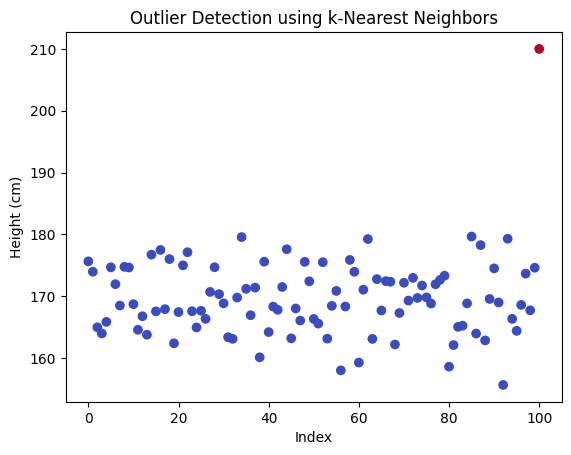

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data with one outlier
data = np.random.normal(170, 5, size=(100, 1))
data = np.append(data, [[210]], axis=0)

# Fit a k-Nearest Neighbors outlier detector
knn = KNN(n_neighbors=5, contamination=0.01)
knn.fit(data)

# Predict the outliers
outlier_predictions = knn.predict(data)

# Plot the data and the detected outlier
plt.scatter(range(len(data)), data, c=outlier_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Outlier Detection using k-Nearest Neighbors')
plt.show()

In the above example, we generate a sample dataset containing the heights of people in a population, with one exceptionally tall individual (210 cm). We use the K-Nearest Neighbors (KNN) outlier detection method from the PyOD package to detect the outlier. The plot shows the data points with their indices, and the detected outlier is highlighted in a different color.

## Outlier Detection: Synthetic Data

In [39]:
# Generate sample data

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

In [40]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]

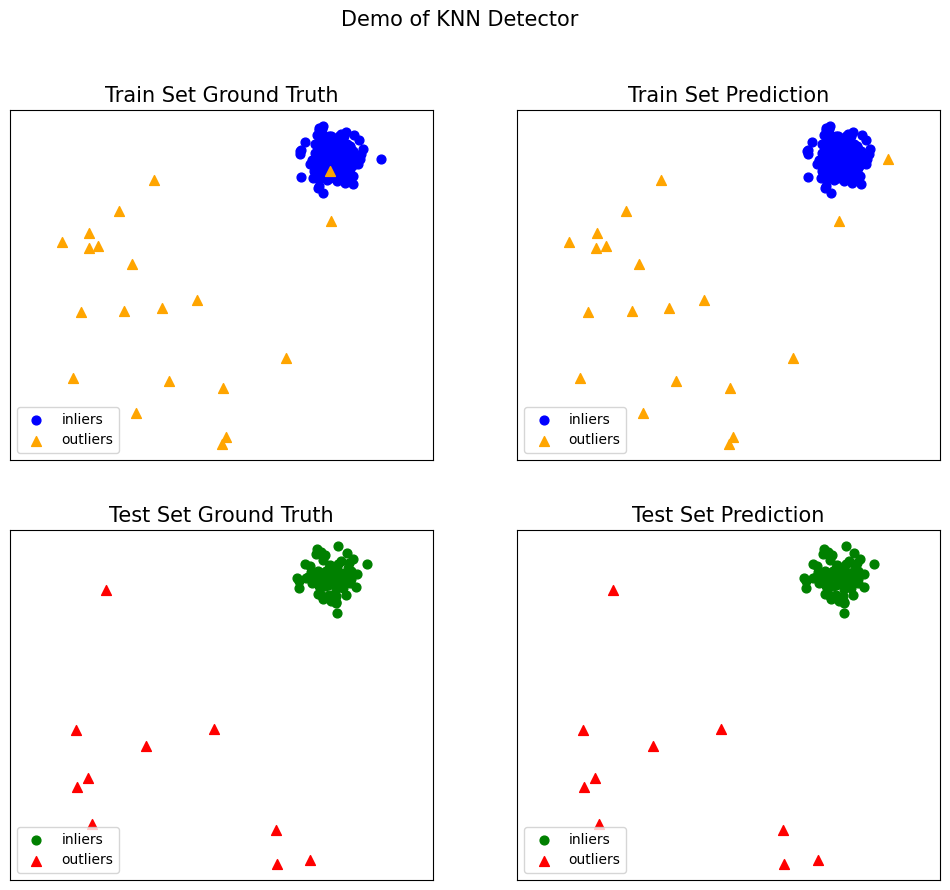

In [41]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## Your Tasks

Try out different algorithms (Isolation Forest and LOF) for the above outlier detection problems (body heights and synthetic data). Are there any differences compared to KNN? Please do some analysis.

Don't forget to put your name and student ID.

**Name: Alvaro Austin**

**Student ID: 2106752180**

Make sure you type down your solutions below.

In [42]:
from pyod.models.lof import LOF

### People Heights

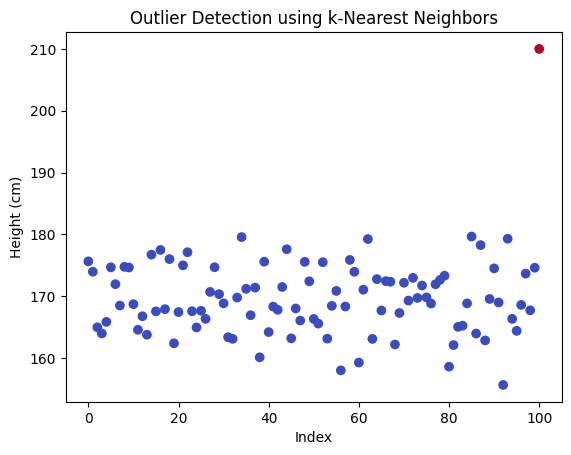

In [43]:
# Fit a k-Nearest Neighbors outlier detector
lof = LOF(n_neighbors=5, contamination=0.01)
lof.fit(data)

# Predict the outliers
outlier_predictions = lof.predict(data)

# Plot the data and the detected outlier
plt.scatter(range(len(data)), data, c=outlier_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Outlier Detection using LOF')
plt.show()

In [44]:
# Import the model

lof = LOF()

lof.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = lof.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = lof.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = lof.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = lof.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = lof.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]lof

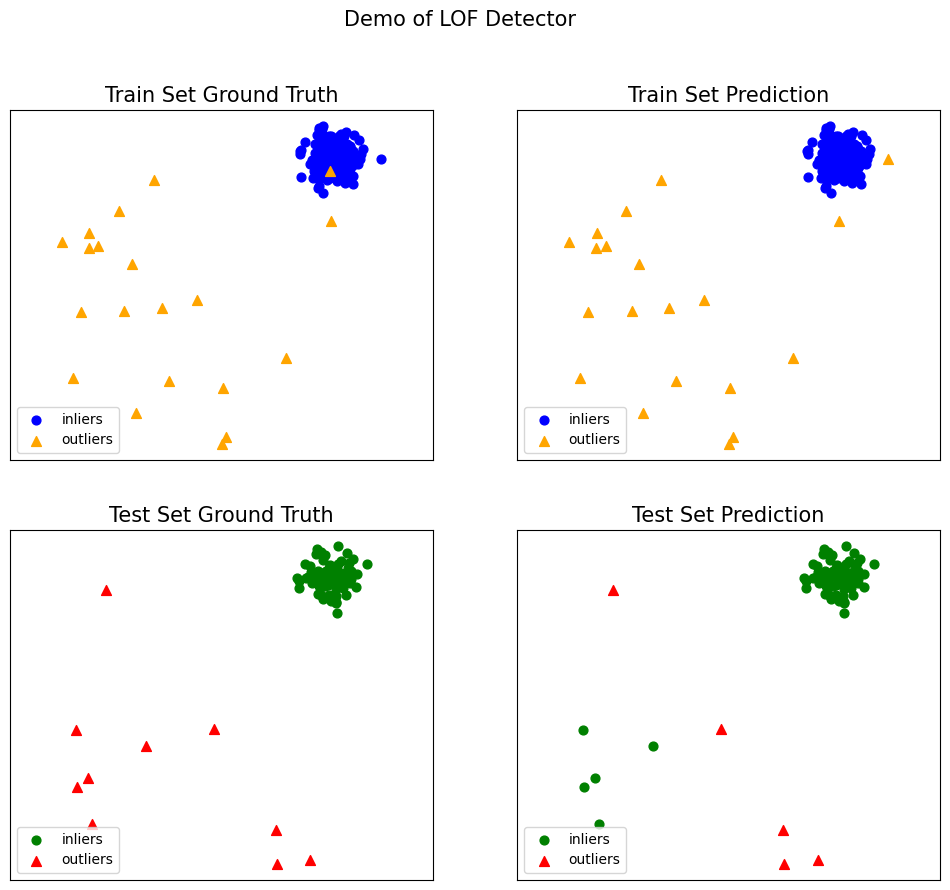

In [45]:
visualize("LOF", X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [46]:
from pyod.models.iforest import IForest

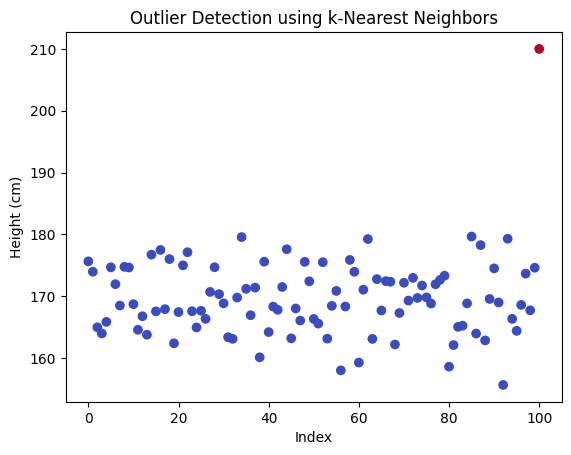

In [47]:
# Fit a k-Nearest Neighbors outlier detector
iforest = IForest(n_estimators=5, contamination=0.01)
iforest.fit(data)

# Predict the outliers
outlier_predictions = iforest.predict(data)

# Plot the data and the detected outlier
plt.scatter(range(len(data)), data, c=outlier_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Outlier Detection using I Forest')
plt.show()

In [48]:
# Import the model

iforest = IForest()

iforest.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = iforest.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = iforest.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = iforest.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = iforest.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = iforest.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]lof

In [ ]:
visualize("Isolation Forest", X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

### Analisis

Terdapat banyak kesamaan. Namun dalam beberapa kali dijalankan tidak terdapat perbedaan yang dapat dilihat dari 2 algoritma tersebut. Menurut saya ini terjadi karena data yang dihasilkan menyebabkan kedua algoritma mengklasifikasikan poin tersebut sebagai outlier.

Pada isolation forest, datapoin tersebut menunjukkan bahwa poin yang merupakan outlier akan lebih mudah untuk diisolasi dibandingkan inliers. Hal ini berarti datapoin pada pojok kanan atas lebih mudah terisolasi.

Pada body heights, data poin yang merupakan outlier lebih mudah terisolasi karena:
- Pada algoritma LOF: kita dapat melihat density dari data poin dititik pojok atas lebih kecil secara signifikan dengan inlier yang lain.
- Pada algoritma IForest: kita dapat melihat bahwa data poin di titik pojok atas dapat dilakukan isolasi dengan mudah hanya dengan beberapa cuts.

Pada syntethic data, data poin yang merupakan outlier dapat dilihat dari jalannya algoritma ini:
- Pada algoritma LOF, dilihat bahwa yang digolongkan sebagai outlier, adalah data poin yang densitynya berbeda dengan iniers yang lain.
- Pada IForest, jumlah cut untuk outlier lebih kecil dibandingkan jumlah cut untuk mengisolasikan inliers.

Perbedaan dengan KNN tidak terlihat dari hasilnya.

References:
- https://pyod.readthedocs.io/en/latest/example.html
- https://saturncloud.io/glossary/outlier-detection/